In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset_path = '/Users/wei7614/Documents/Programming/Python/ML/Kaggle/datasets/titanic/'

test_data_source = pd.read_csv(dataset_path + 'test.csv')
train_data_source = pd.read_csv(dataset_path + 'train.csv')

In [2]:
#看training data
train_data_source.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 先來看看missing value的狀況

train_data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 由training data info可以知道Age, Cabin, Embarked (從哪個港口上船的)有 missing value
# 再來看看 testing data
test_data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


male survival rate = 0.1889
female survival rate = 0.7420


<AxesSubplot:xlabel='Sex', ylabel='count'>

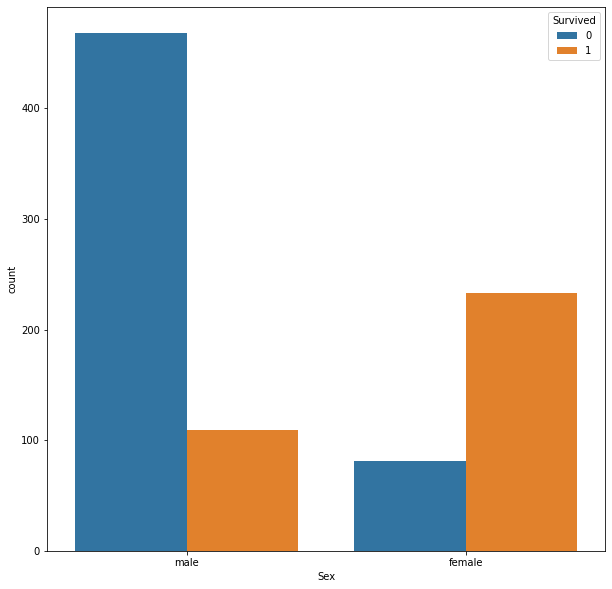

In [5]:
# 測試資料裡面 Age 以及 cabin 跟 Fare有 missing value 
# missing value稍等再來處理，先來看一下每個feature跟survived的關係
# 各性別的生存率

male_survived = train_data_source.loc[train_data_source.Sex =='male']['Survived']
female_survived = train_data_source.loc[train_data_source.Sex == 'female']['Survived']
print('male survival rate = {0:.4f}'.format(male_survived.sum()/male_survived.count()))
print('female survival rate = {0:.4f}'.format(female_survived.sum()/female_survived.count()))

plt.subplots(figsize=(10, 10))
sns.countplot(x='Sex', hue='Survived', data=train_data_source)

<AxesSubplot:xlabel='Age_range', ylabel='count'>

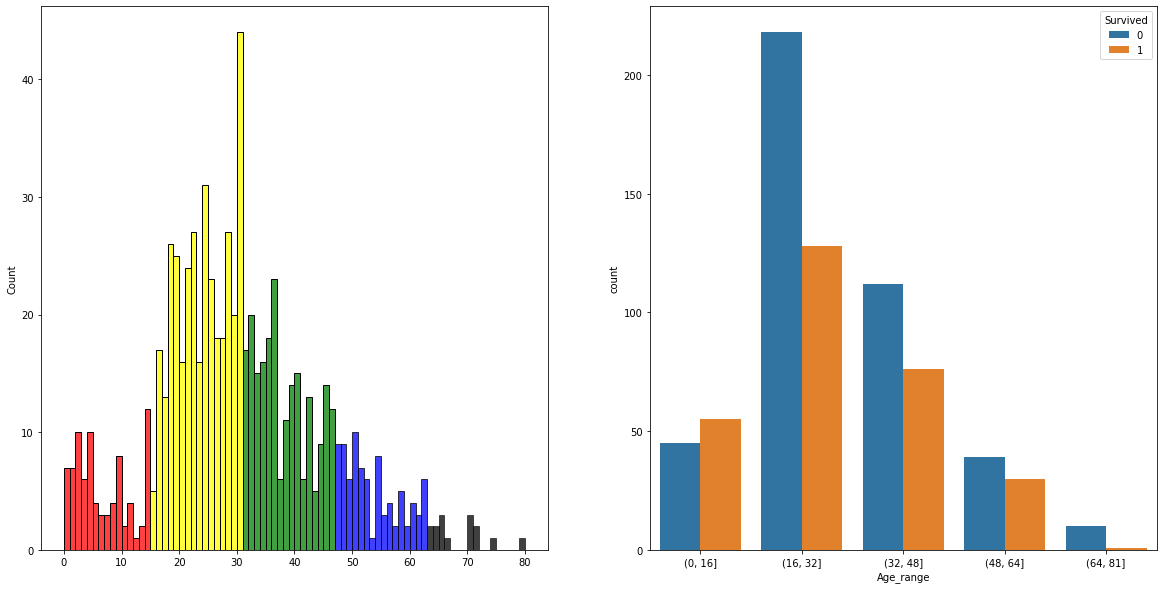

In [15]:
# 我將年齡從0-81分成五群，並且看一下裡面死亡存會的分佈
fg, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(train_data_source.Age.dropna().values, bins=range(0, 16), color='red', ax=ax_left)
sns.histplot(train_data_source.Age.dropna().values, bins=range(15, 32), color='yellow', ax=ax_left)
sns.histplot(train_data_source.Age.dropna().values, bins=range(31, 48), color='green', ax=ax_left)
sns.histplot(train_data_source.Age.dropna().values, bins=range(47, 64), color='blue', ax=ax_left)
sns.histplot(train_data_source.Age.dropna().values, bins=range(63, 81), color='black', ax=ax_left)

train_data_source['Age_range'] = pd.cut(train_data_source.Age, bins=[0, 16,32,48,64,81])
sns.countplot(x=train_data_source.Age_range, hue=train_data_source.Survived, ax=ax_right)

In [ ]:
# 從上圖可以得知 船上大部分的人年齡分佈在 15 - 45左右，且 16 - 32 死最多人